In [8]:
import pandas as pd

df = pd.read_csv('jam.csv', header=None)
print(df.shape)
print(df.head())

(3, 407040)
   0       1       2       3       4       5       6       7       8       \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

   9       ...  407030  407031  407032  407033  407034  407035  407036  \
0       0  ...    3816    3816    3822    3816    3828       0       0   
1       0  ...       0    3623    3618    3612    3602       0       0   
2       0  ...    3565    3565    3565    3570    3575    3575       0   

   407037  407038  407039  
0       0       0       0  
1       0       0       0  
2       0       0       0  

[3 rows x 407040 columns]


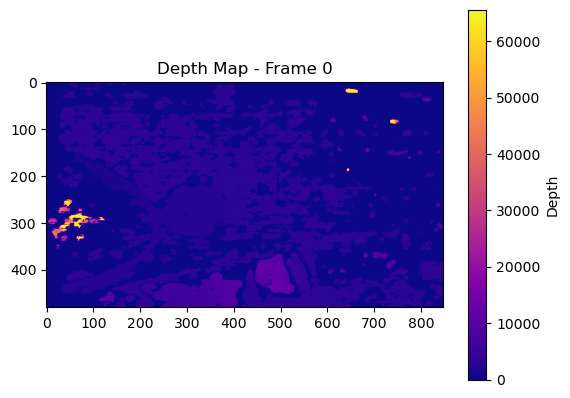

In [7]:
import matplotlib.pyplot as plt

frame = df.iloc[0].values.reshape((480, 848))
plt.imshow(frame, cmap='plasma')
plt.colorbar(label='Depth')
plt.title("Depth Map - Frame 0")
plt.show()

In [ ]:
depth_values = frame.flatten()
# valid_depths = depth_values[(depth_values > min_thresh) & (depth_values < max_thresh)]